In [131]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

In [132]:
image_directory = 'C:\\Users\\Vishal V\\SCA\\Project\\CARLA Data\\CARLA.v20-carla_v20.multiclass\\train\\'

In [133]:
df = pd.read_csv(r'C:\Users\Vishal V\SCA\Project\CARLA Data\CARLA.v20-carla_v20.multiclass\train\_classes.csv')    
print(df.head()) 
print(df.columns)

                                            filename   bike   motobike  \
0  063074_png.rf.a2f49a420f25fd44efe8b30f4c66b648...      0          1   
1  005647_png.rf.9f3219dadf22ab36775e21622eeaf857...      0          0   
2  016781_png.rf.a1ae5eca67839d3a3360ddb504bd213d...      0          0   
3  014475_png.rf.a31dc322b744007c3d1559f033cca7e4...      0          0   
4  008417_png.rf.a1b300b906915d805a6ca45193875bb2...      0          0   

    person   traffic_light_green   traffic_light_orange   traffic_light_red  \
0        0                     1                      0                   0   
1        0                     0                      0                   1   
2        0                     1                      0                   0   
3        0                     1                      0                   0   
4        0                     0                      0                   0   

    traffic_sign_30   traffic_sign_60   traffic_sign_90   vehicle  
0           

In [134]:
df = df.iloc[:1600]

In [135]:
SIZE = 200
X_dataset = []  
for i in tqdm(range(df.shape[0])):
    img = image.load_img(image_directory +df['filename'][i], target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)


100%|█████████████████████████████████████████████████████████████████████████████| 1600/1600 [00:05<00:00, 295.85it/s]


In [136]:
X = np.array(X_dataset)

In [137]:
print(df['filename'][500])

005286_png.rf.cc715435d55e86b3392e33523be1792a.jpg


In [138]:
y = np.array(df.drop(['filename'], axis=1))
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

X_normalized = (X - mean) / std

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, random_state=20, test_size=0.3)

In [140]:
model = Sequential()

In [141]:
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [142]:
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

In [143]:
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

In [144]:
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

In [145]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='sigmoid'))

In [146]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 196, 196, 32)      2432      
                                                                 
 batch_normalization_22 (Ba  (None, 196, 196, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 98, 98, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 98, 98, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 94, 94, 48)        38448     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 47, 47, 48)       

In [147]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [148]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=1)

Epoch 1/1000
1120/1120 [==============================] - 26s 21ms/step - loss: 0.4364 - accuracy: 0.2259 - val_loss: 0.3202 - val_accuracy: 0.2979
Epoch 2/1000
1120/1120 [==============================] - 23s 21ms/step - loss: 0.2835 - accuracy: 0.3411 - val_loss: 0.2566 - val_accuracy: 0.3896
Epoch 3/1000
1120/1120 [==============================] - 22s 20ms/step - loss: 0.2359 - accuracy: 0.4339 - val_loss: 0.2427 - val_accuracy: 0.4375
Epoch 4/1000
1120/1120 [==============================] - 23s 20ms/step - loss: 0.1989 - accuracy: 0.4723 - val_loss: 0.2240 - val_accuracy: 0.4979
Epoch 5/1000
1120/1120 [==============================] - 22s 20ms/step - loss: 0.1853 - accuracy: 0.4902 - val_loss: 0.1793 - val_accuracy: 0.5063
Epoch 6/1000
1120/1120 [==============================] - 22s 20ms/step - loss: 0.1708 - accuracy: 0.5098 - val_loss: 0.1745 - val_accuracy: 0.5000
Epoch 7/1000
1120/1120 [==============================] - 24s 21ms/step - loss: 0.1680 - accuracy: 0.5143 - val_

1120/1120 [==============================] - 24s 22ms/step - loss: 0.0500 - accuracy: 0.6982 - val_loss: 0.1573 - val_accuracy: 0.5938
Epoch 57/1000
1120/1120 [==============================] - 24s 22ms/step - loss: 0.0554 - accuracy: 0.6714 - val_loss: 0.1522 - val_accuracy: 0.5938
Epoch 58/1000
1120/1120 [==============================] - 25s 22ms/step - loss: 0.0517 - accuracy: 0.6518 - val_loss: 0.1468 - val_accuracy: 0.5979
Epoch 59/1000
1120/1120 [==============================] - 23s 20ms/step - loss: 0.0503 - accuracy: 0.6509 - val_loss: 0.1613 - val_accuracy: 0.6125
Epoch 60/1000
1120/1120 [==============================] - 23s 20ms/step - loss: 0.0460 - accuracy: 0.6768 - val_loss: 0.1590 - val_accuracy: 0.5646
Epoch 61/1000
1120/1120 [==============================] - 22s 20ms/step - loss: 0.0442 - accuracy: 0.6687 - val_loss: 0.1721 - val_accuracy: 0.5437
Epoch 62/1000
1120/1120 [==============================] - 25s 23ms/step - loss: 0.0514 - accuracy: 0.6500 - val_loss: 0

1120/1120 [==============================] - 23s 21ms/step - loss: 0.0371 - accuracy: 0.6884 - val_loss: 0.1675 - val_accuracy: 0.6250
Epoch 112/1000
1120/1120 [==============================] - 24s 21ms/step - loss: 0.0307 - accuracy: 0.7054 - val_loss: 0.2071 - val_accuracy: 0.5042
Epoch 113/1000
1120/1120 [==============================] - 24s 22ms/step - loss: 0.0302 - accuracy: 0.7277 - val_loss: 0.2031 - val_accuracy: 0.5813
Epoch 114/1000
1120/1120 [==============================] - 24s 22ms/step - loss: 0.0348 - accuracy: 0.7089 - val_loss: 0.2279 - val_accuracy: 0.6313
Epoch 115/1000
1120/1120 [==============================] - 24s 21ms/step - loss: 0.0331 - accuracy: 0.7179 - val_loss: 0.2314 - val_accuracy: 0.5104
Epoch 116/1000
1120/1120 [==============================] - 24s 22ms/step - loss: 0.0426 - accuracy: 0.7071 - val_loss: 0.1976 - val_accuracy: 0.5708
Epoch 117/1000
1120/1120 [==============================] - 25s 22ms/step - loss: 0.0292 - accuracy: 0.6964 - val_l

Epoch 166/1000
1120/1120 [==============================] - 25s 22ms/step - loss: 0.0233 - accuracy: 0.7321 - val_loss: 0.3104 - val_accuracy: 0.6292
Epoch 167/1000
1120/1120 [==============================] - 24s 22ms/step - loss: 0.0360 - accuracy: 0.7321 - val_loss: 0.2798 - val_accuracy: 0.5104
Epoch 168/1000
1120/1120 [==============================] - 23s 21ms/step - loss: 0.0429 - accuracy: 0.7196 - val_loss: 0.2450 - val_accuracy: 0.5979
Epoch 169/1000
1120/1120 [==============================] - 24s 22ms/step - loss: 0.0312 - accuracy: 0.7116 - val_loss: 0.2198 - val_accuracy: 0.5958
Epoch 170/1000
1120/1120 [==============================] - 25s 22ms/step - loss: 0.0262 - accuracy: 0.7071 - val_loss: 0.2405 - val_accuracy: 0.5854
Epoch 171/1000
1120/1120 [==============================] - 25s 22ms/step - loss: 0.0269 - accuracy: 0.6982 - val_loss: 0.2932 - val_accuracy: 0.5333
Epoch 172/1000
1120/1120 [==============================] - 24s 21ms/step - loss: 0.0324 - accuracy:

KeyboardInterrupt: 

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
classes = np.array(df.columns[1:])
classes

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
classes = np.array(df.columns[1:])


In [125]:
img = image.load_img(r"C:\Users\Vishal V\SCA\Project\CARLA Data\CARLA.v20-carla_v20.multiclass\valid\Town05_016500_png.rf.75b431585ae9c755044e81517b796324.jpg", target_size=(SIZE,SIZE,3))

In [126]:
img = image.img_to_array(img)

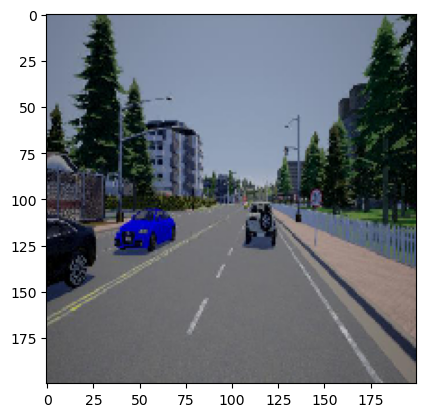

In [127]:
img = img/255.
plt.imshow(img)

In [128]:
img = np.expand_dims(img, axis=0)

In [129]:
classes = np.array(df.columns[1:])
proba = model.predict(img) 
sorted_categories = np.argsort(proba[0])[:-11:-1]
classes

1/1 [==============================] - 0s 137ms/step


array([' bike', ' motobike', ' person', ' traffic_light_green',
       ' traffic_light_orange', ' traffic_light_red', ' traffic_sign_30',
       ' traffic_sign_60', ' traffic_sign_90', ' vehicle'], dtype=object)

In [130]:
for i in range(10):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))
classes
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

 person (0.558)
 traffic_light_green (0.528)
 traffic_light_red (0.515)
 traffic_light_orange (0.486)
 traffic_sign_90 (0.473)
 traffic_sign_30 (0.466)
 bike (0.464)
 traffic_sign_60 (0.415)
 vehicle (0.401)
 motobike (0.396)
15/15 [==============================] - 2s 127ms/step - loss: 0.5836 - accuracy: 0.2333
Accuracy =  23.333333432674408 %
